In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Crop_recommendation.csv')


In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
# Renommage des colonnes
data.columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temp', 'Humidity', 'pH', 'Rainfall', 'Label']
data.head()

,Nitrogen,Phosphorus,Potassium,Temp,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


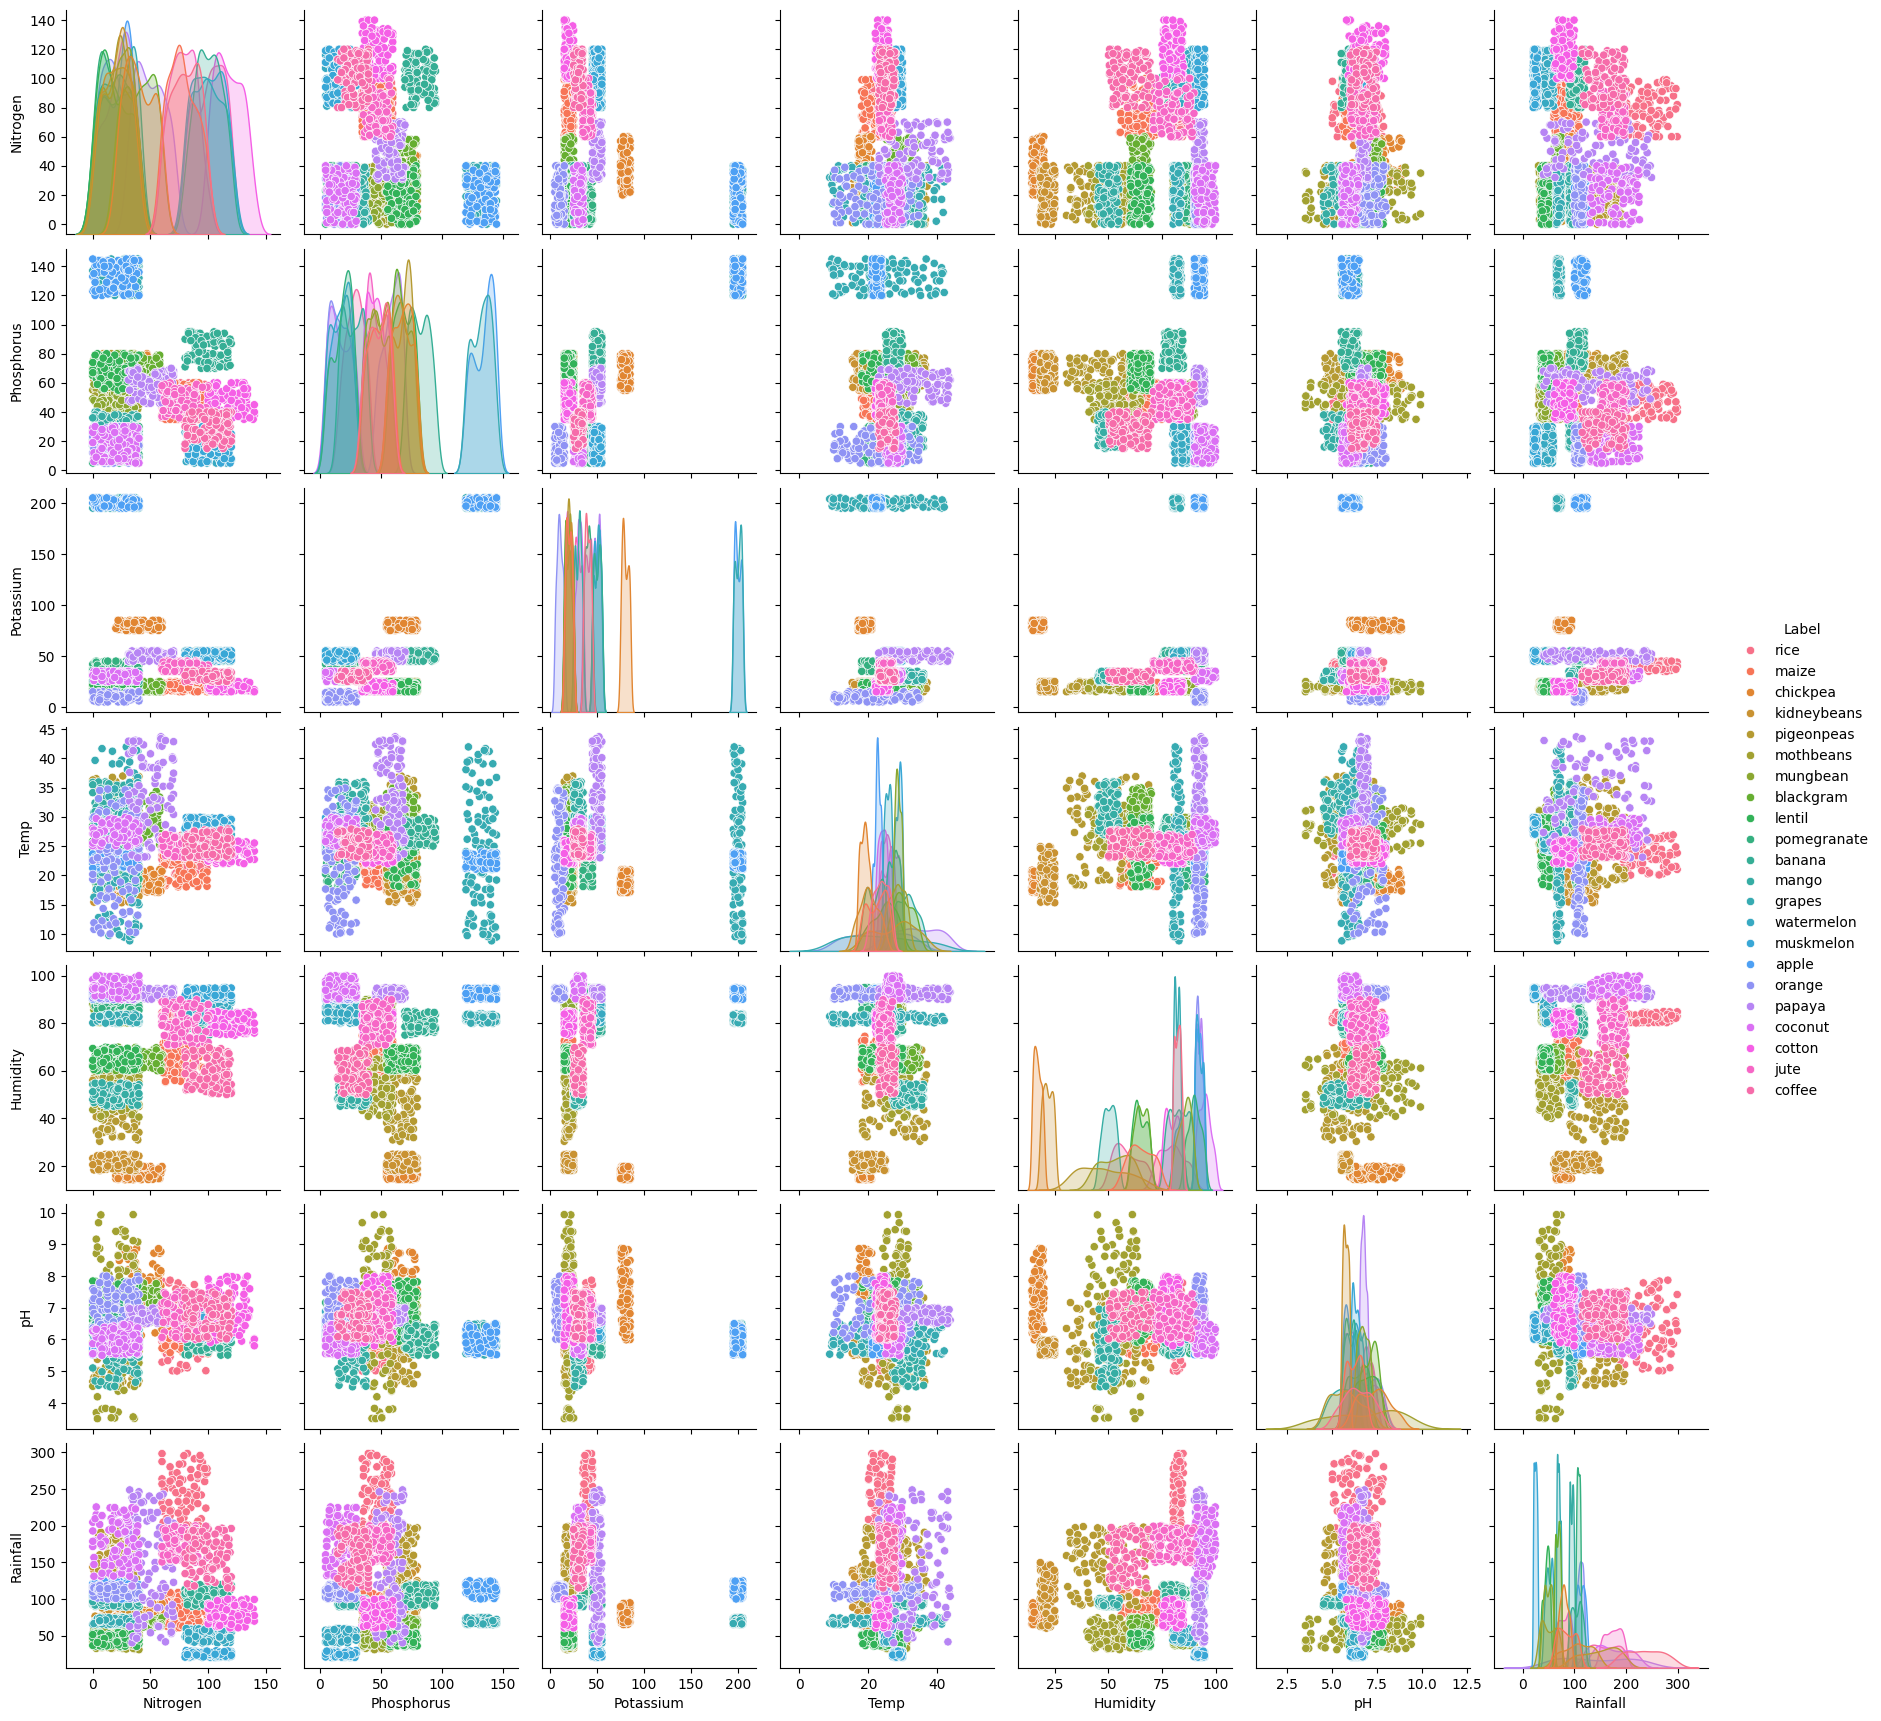

In [10]:
# Pairplot des variables
sns.pairplot(data, hue='Label')
plt.show()


In [11]:
# Moyenne et médiane de la colonne Nitrogen
mean_nitrogen = data['Nitrogen'].mean()
mean_nitrogen


50.551818181818184

In [12]:
median_nitrogen = data['Nitrogen'].median()
median_nitrogen

37.0

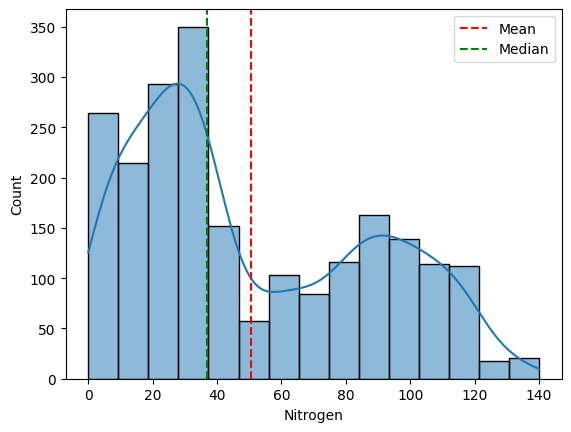

In [13]:
# Tracé de l'histogramme
sns.histplot(data['Nitrogen'], kde=True)
plt.axvline(mean_nitrogen, color='red', linestyle='--', label='Mean')
plt.axvline(median_nitrogen, color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

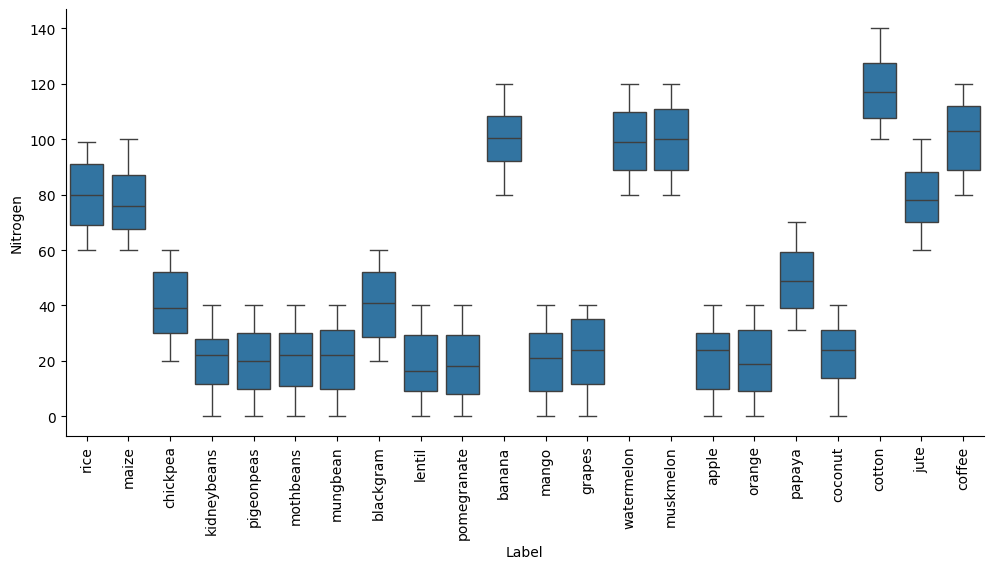

In [14]:
sns.catplot(x='Label', y='Nitrogen', kind='box', height=5, aspect=2, data=data)
plt.xticks(rotation='vertical')
plt.show()


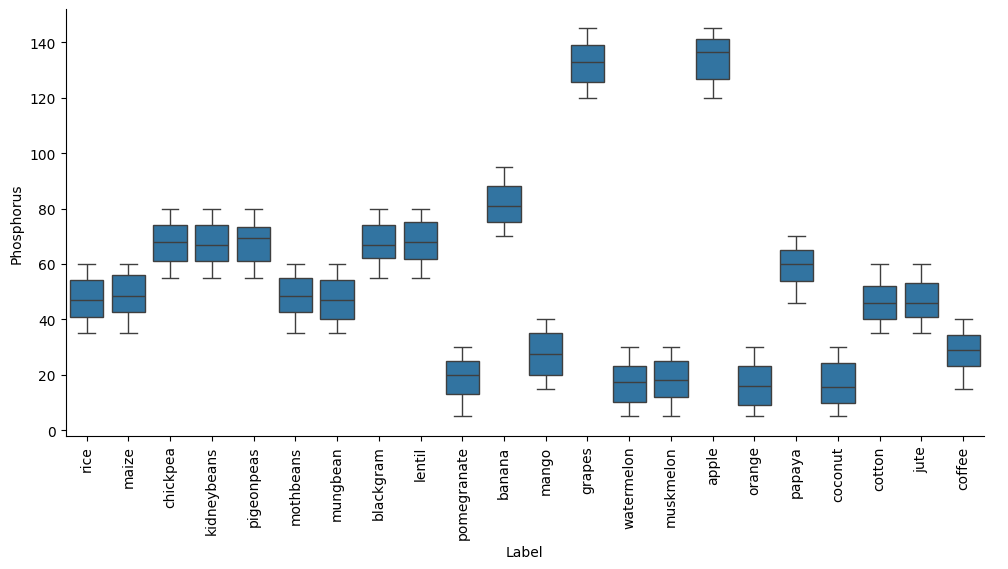

In [15]:
sns.catplot(x='Label', y='Phosphorus', kind='box', height=5, aspect=2, data=data)
plt.xticks(rotation='vertical')
plt.show()



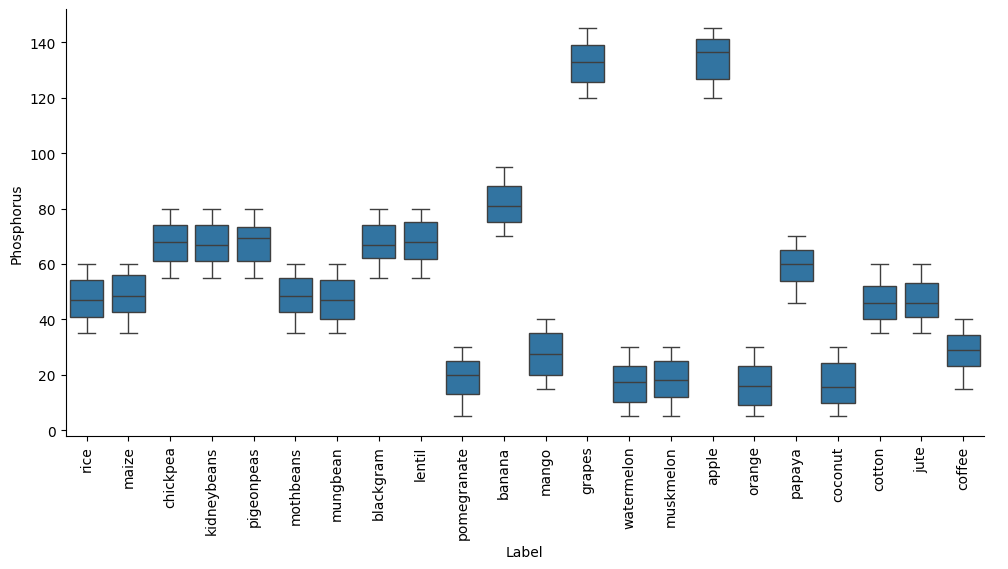

In [16]:
sns.catplot(x='Label', y='Phosphorus', kind='box', height=5, aspect=2, data=data)
plt.xticks(rotation='vertical')
plt.show()



In [17]:
mean_df = data.groupby('Label').mean().reset_index()
mean_df


,Label,Nitrogen,Phosphorus,Potassium,Temp,Humidity,pH,Rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [18]:
for col in mean_df.columns[1:]:
    top_5 = mean_df[['Label', col]].sort_values(by=col, ascending=False).head(5)
    print(f"\nTop 5 cultures for {col}:")
    print(top_5)



Top 5 cultures for Nitrogen:
         Label  Nitrogen
6       cotton    117.77
5       coffee    101.20
15   muskmelon    100.32
1       banana    100.23
21  watermelon     99.42

Top 5 cultures for Phosphorus:
       Label  Phosphorus
0      apple      134.22
7     grapes      132.53
1     banana       82.01
10    lentil       68.36
3   chickpea       67.79

Top 5 cultures for Potassium:
         Label  Potassium
7       grapes     200.11
0        apple     199.89
3     chickpea      79.92
21  watermelon      50.22
15   muskmelon      50.08

Top 5 cultures for Temp:
        Label       Temp
17     papaya  33.723859
12      mango  31.208770
2   blackgram  29.973340
15  muskmelon  28.663066
14   mungbean  28.525775

Top 5 cultures for Humidity:
        Label   Humidity
4     coconut  94.844272
17     papaya  92.403388
15  muskmelon  92.342802
0       apple  92.333383
16     orange  92.170209

Top 5 cultures for pH:
        Label        pH
3    chickpea  7.336957
2   blackgram  7.133952

In [19]:
for col in mean_df.columns[1:]:
    bottom_5 = mean_df[['Label', col]].sort_values(by=col).head(5)
    print(f"\nBottom 5 cultures for {col}:")
    print(bottom_5)



Bottom 5 cultures for Nitrogen:
          Label  Nitrogen
10       lentil     18.77
19  pomegranate     18.87
16       orange     19.58
12        mango     20.07
18   pigeonpeas     20.73

Bottom 5 cultures for Phosphorus:
          Label  Phosphorus
16       orange       16.55
4       coconut       16.93
21   watermelon       17.00
15    muskmelon       17.72
19  pomegranate       18.75

Bottom 5 cultures for Potassium:
        Label  Potassium
16     orange      10.01
2   blackgram      19.24
10     lentil      19.41
6      cotton      19.56
11      maize      19.79

Bottom 5 cultures for Temp:
          Label       Temp
3      chickpea  18.872847
9   kidneybeans  20.115085
19  pomegranate  21.837842
11        maize  22.389204
0         apple  22.630942

Bottom 5 cultures for Humidity:
          Label   Humidity
3      chickpea  16.860439
9   kidneybeans  21.605357
18   pigeonpeas  48.061633
12        mango  50.156573
13    mothbeans  53.160418

Bottom 5 cultures for pH:
          L

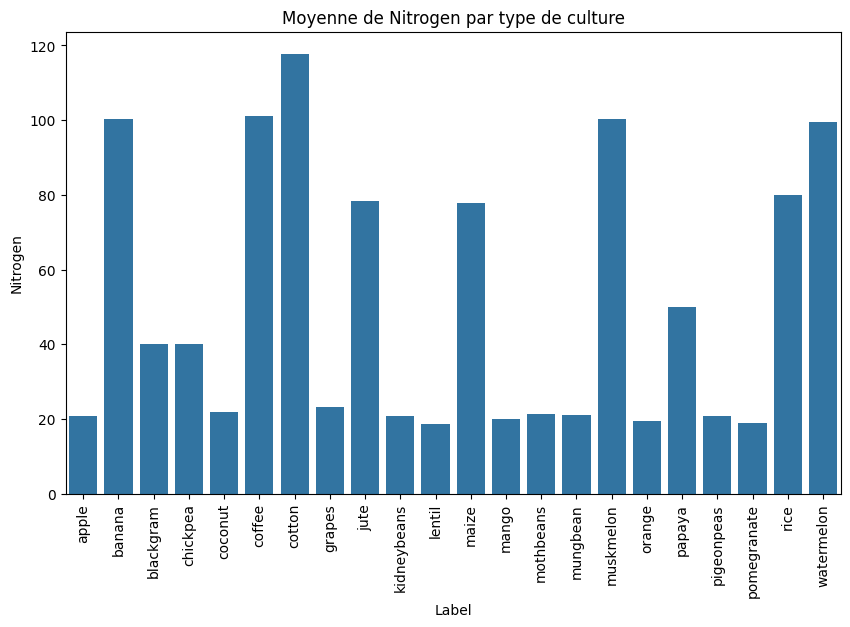

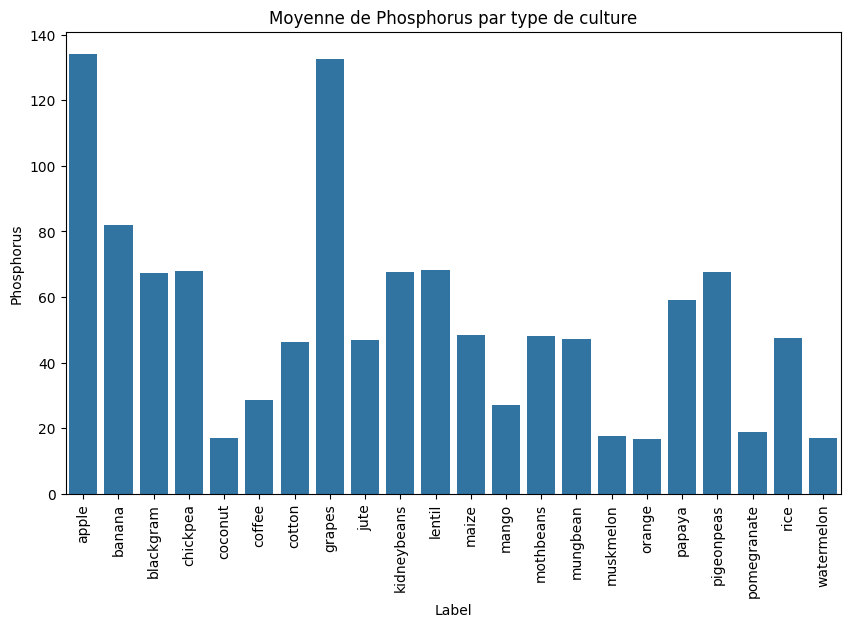

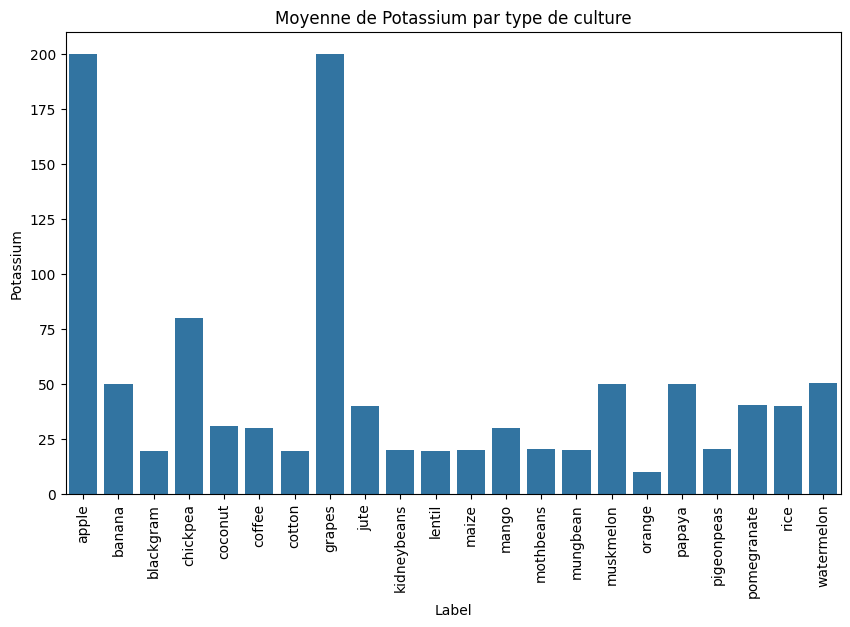

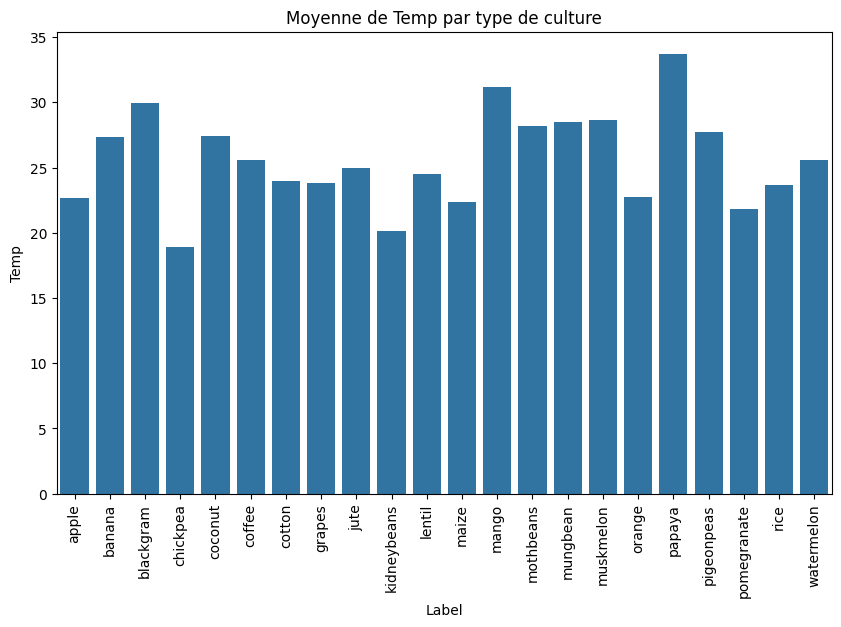

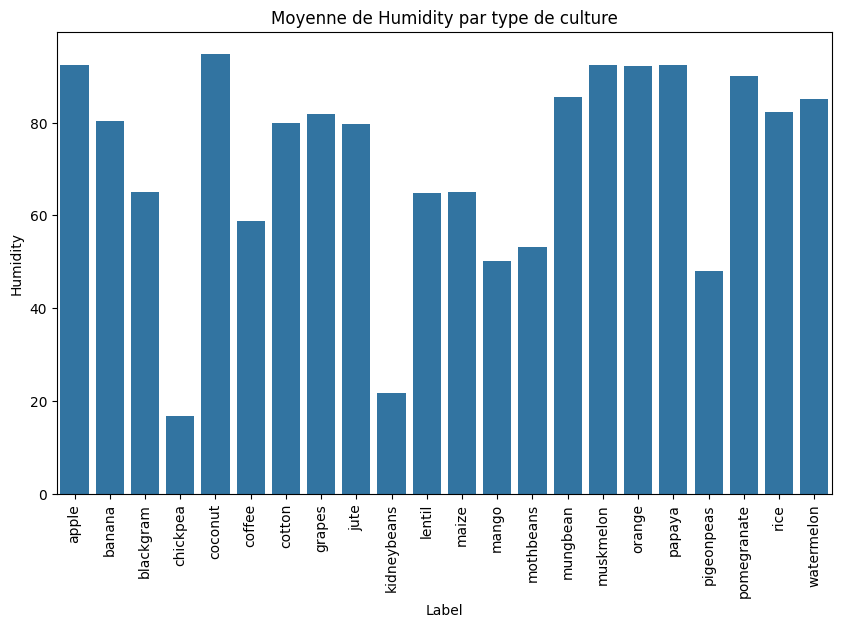

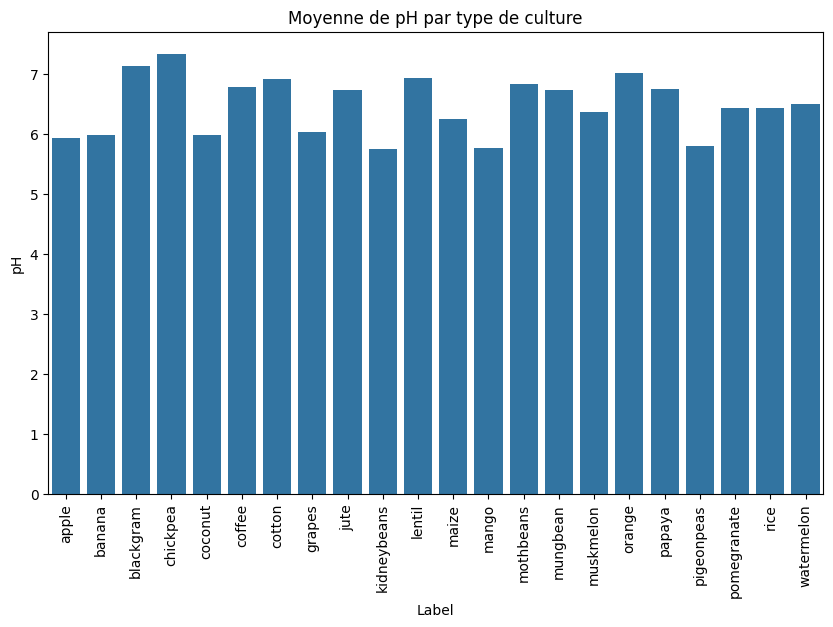

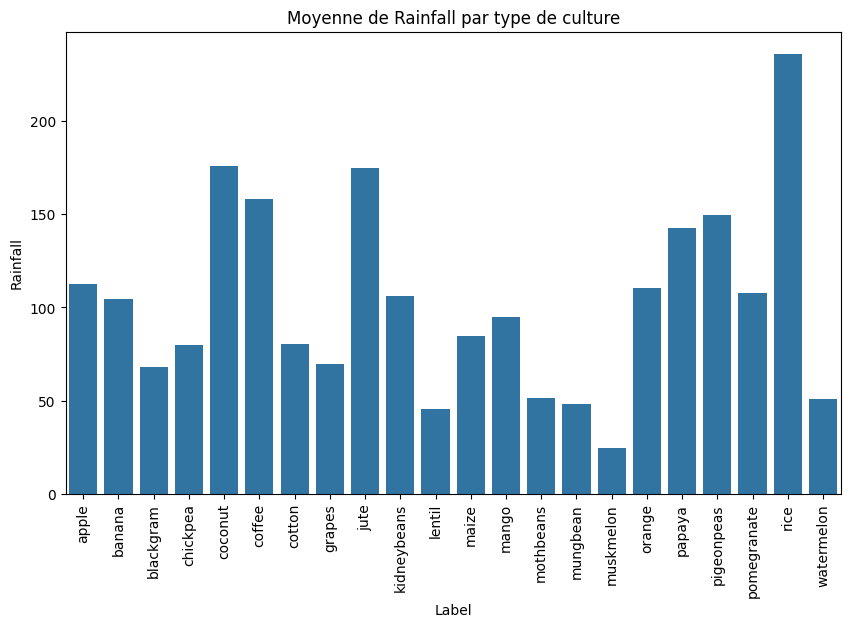

In [20]:
for col in mean_df.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Label', y=col, data=mean_df)
    plt.xticks(rotation='vertical')
    plt.title(f'Moyenne de {col} par type de culture')
    plt.show()


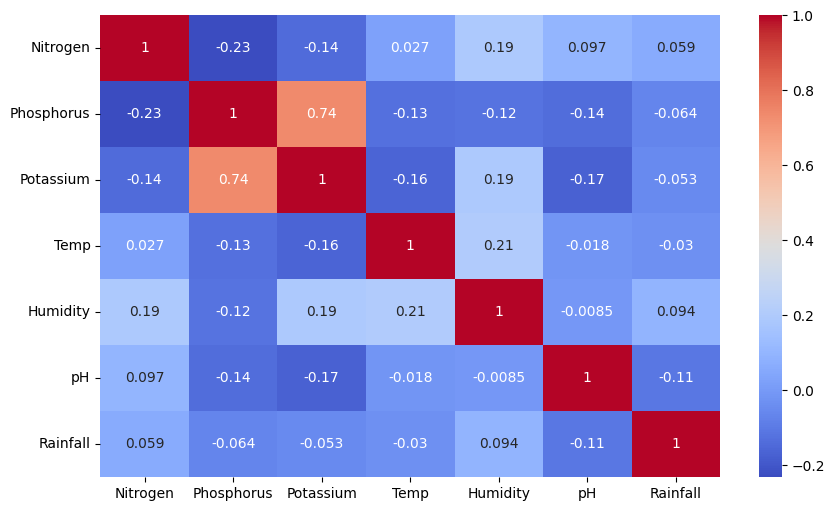

In [21]:
# Sélection des colonnes numériques
numeric_df = data.select_dtypes(include=[np.number])

# Heatmap des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [22]:
# Affichage des valeurs uniques de la colonne 'Label'
unique_labels = data['Label'].unique()
print(unique_labels)


['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conversion de la variable catégorielle 'Label' en valeurs numériques
data['Label_num'], _ = pd.factorize(data['Label'])


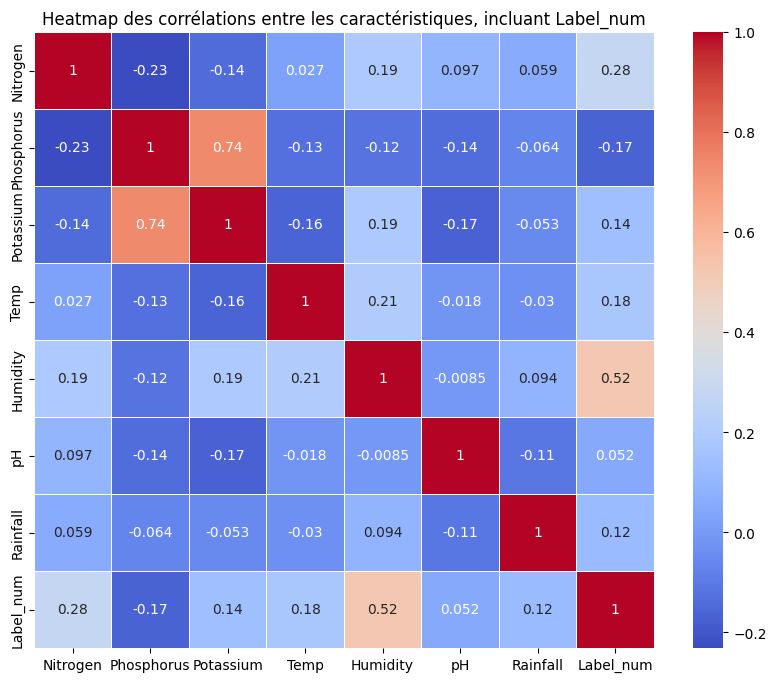

In [24]:
# Sélection des colonnes numériques pour la heatmap
numeric_df = data[['Nitrogen', 'Phosphorus', 'Potassium', 'Temp', 'Humidity', 'pH', 'Rainfall', 'Label_num']]

# Création de la heatmap pour visualiser les corrélations avec des annotations
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap des corrélations entre les caractéristiques, incluant Label_num")
plt.show()


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes numériques (sans 'Label')
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temp', 'Humidity', 'pH', 'Rainfall']

# Normalisation des données pour la PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Application de PCA pour réduire à 2 composantes principales
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Création d'un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Label'] = data['Label']


In [26]:
import plotly.express as px

# Création du graphique de dispersion pour les deux premières composantes principales
fig = px.scatter(
    pca_df, x='PCA1', y='PCA2',
    color='Label',
    title="Projection des cultures sur les deux premières composantes principales (PCA)",
    labels={'PCA1': 'Composante Principale 1', 'PCA2': 'Composante Principale 2'}
)

# Affichage du graphique
fig.show()


In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialisation de l'encodeur
label_encoder = LabelEncoder()

# Transformation de la colonne 'Label' en une représentation numérique
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])


In [30]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temp,Humidity,pH,Rainfall,Label,Label_num,Label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0,20


In [45]:
from sklearn.model_selection import train_test_split

# Définition des caractéristiques (X) et de la variable cible (y)
X = data.drop(columns=['Label', 'Label_encoded'])
y = data['Label_encoded']

# Division des données avec un échantillonnage stratifié selon la variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [32]:
# Affichage des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)


Dimensions de l'ensemble d'entraînement : (1540, 8)
Dimensions de l'ensemble de test : (660, 8)


In [48]:
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler = StandardScaler()

# Application du scaler sur les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Transformation des données de test en utilisant le même scaler
X_test_scaled = scaler.transform(X_test)


In [49]:
# Conversion des données normalisées en DataFrame pour affichage
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Affichage des 5 premières lignes des données normalisées
X_train_scaled_df.head()


,Nitrogen,Phosphorus,Potassium,Temp,Humidity,pH,Rainfall
0,-1.335936,0.417499,-0.535091,0.378274,-0.489416,0.105457,-1.006138
1,1.797538,0.874355,-0.061709,-0.056432,0.352421,-1.102431,0.037615
2,-1.308923,0.234757,-0.554816,-0.672000,-2.173304,-0.662710,-0.486121
3,-0.282441,0.752527,-0.554816,-1.248506,-2.271540,-1.031842,-0.422218
4,-1.173860,-1.013983,-0.712610,-1.765899,1.047107,0.007107,0.121738


In [50]:
# Application de la normalisation sur les données de test en utilisant transform
X_test_scaled = scaler.transform(X_test)
# Conversion des données de test normalisées en DataFrame pour un affichage clair
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Affichage des 5 premières lignes des données de test normalisées
X_test_scaled_df.head()


,Nitrogen,Phosphorus,Potassium,Temp,Humidity,pH,Rainfall
0,-1.065809,0.752527,-0.515367,-0.328943,-2.185815,-0.682134,0.169358
1,-1.038796,-0.435299,-0.535091,0.665518,-0.385148,2.209376,-0.598399
2,-0.741657,0.112928,-0.574540,1.416190,-0.154494,1.006982,-0.545022
3,0.257813,0.143385,-0.219503,0.108439,0.344686,-0.518753,1.239871
4,0.446902,-0.374384,-0.160330,0.051858,0.735100,1.112860,0.896488


In [51]:
# Application de la normalisation sur les données de test en utilisant transform
X_test_scaled = scaler.transform(X_test)
# Conversion des données de test normalisées en DataFrame pour un affichage clair
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Affichage des 5 premières lignes des données de test normalisées
X_test_scaled_df.head()


,Nitrogen,Phosphorus,Potassium,Temp,Humidity,pH,Rainfall
0,-1.065809,0.752527,-0.515367,-0.328943,-2.185815,-0.682134,0.169358
1,-1.038796,-0.435299,-0.535091,0.665518,-0.385148,2.209376,-0.598399
2,-0.741657,0.112928,-0.574540,1.416190,-0.154494,1.006982,-0.545022
3,0.257813,0.143385,-0.219503,0.108439,0.344686,-0.518753,1.239871
4,0.446902,-0.374384,-0.160330,0.051858,0.735100,1.112860,0.896488


In [53]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report


# **LogisticRegression**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Définir les paramètres pour RandomizedSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Valeurs possibles pour le paramètre de régularisation
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Différents solveurs
}

# Initialiser RandomizedSearchCV
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_grid,
    cv=5,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)


In [67]:
# Entraîner le modèle
random_search.fit(X_train, y_train)

# Récupérer le meilleur modèle
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\

Best Parameters: {'solver': 'newton-cg', 'C': 0.01}


In [68]:
from sklearn.metrics import confusion_matrix, classification_report

# Prédictions sur le jeu de test
y_pred = best_model.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:\n", cm)

# Rapport de classification
print("Rapport de classification:\n", classification_report(y_test, y_pred))


Matrice de confusion:
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0 

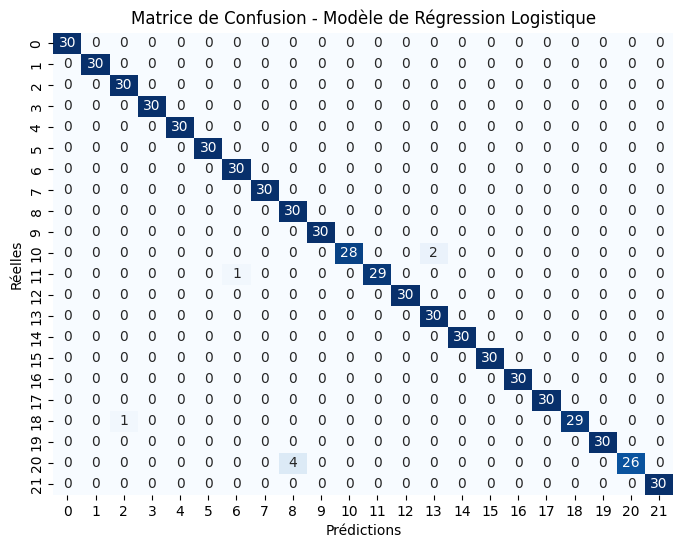

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title("Matrice de Confusion - Modèle de Régression Logistique")
plt.show()


# **KNN**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Liste pour stocker les scores moyens pour chaque k
knn_scores = []

# Boucle pour tester différentes valeurs de k
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    knn_scores.append(scores.mean())


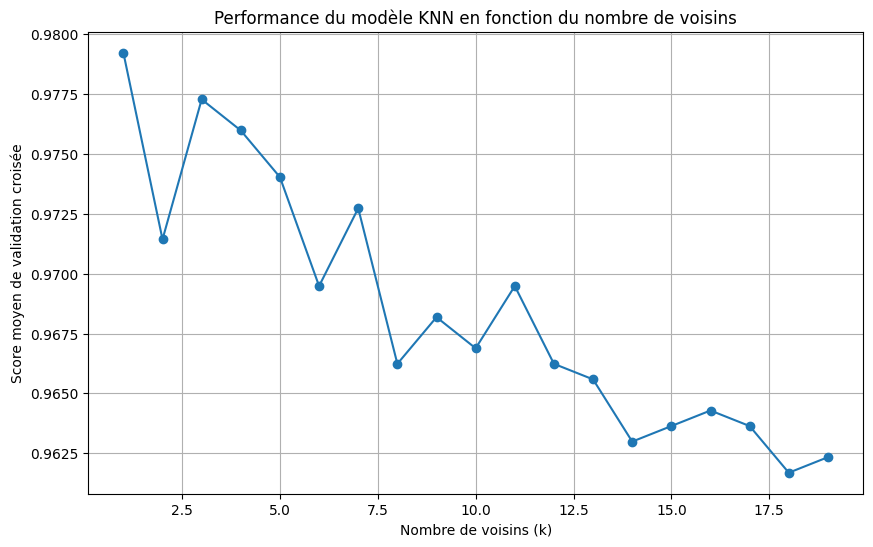

In [71]:
import matplotlib.pyplot as plt

# Graphique des performances
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), knn_scores, marker='o', linestyle='-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score moyen de validation croisée')
plt.title("Performance du modèle KNN en fonction du nombre de voisins")
plt.grid(True)
plt.show()


In [72]:
knn_best = KNeighborsClassifier(n_neighbors=1)
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

# Prédictions sur l'ensemble de test
y_pred = knn_best.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)


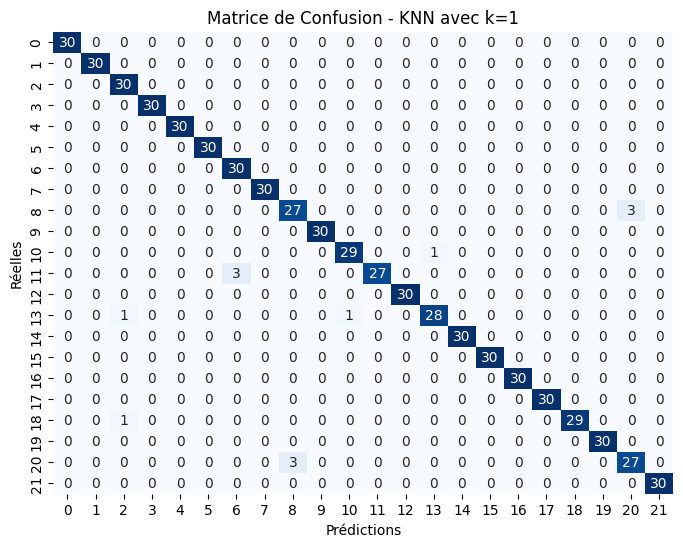

In [74]:
import seaborn as sns

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title("Matrice de Confusion - KNN avec k=1")
plt.show()


In [77]:
print("Rapport de classification :\n", classification_report(y_test, y_pred))


Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.94      1.00      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.91      1.00      0.95        30
           7       1.00      1.00      1.00        30
           8       0.90      0.90      0.90        30
           9       1.00      1.00      1.00        30
          10       0.97      0.97      0.97        30
          11       1.00      0.90      0.95        30
          12       1.00      1.00      1.00        30
          13       0.97      0.93      0.95        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        3

# **SVC**

In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],            # Paramètre de régularisation
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Coefficient de noyau
    'kernel': ['linear', 'rbf', 'poly']       # Types de noyaux
}

# Initialiser RandomizedSearchCV pour SVC
random_search_svc = RandomizedSearchCV(
    SVC(),
    param_distributions=param_grid,
    cv=5,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)

# Exécuter la recherche sur les données d'entraînement
random_search_svc.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_svc = random_search_svc.best_params_
print("Meilleurs paramètres pour SVC:", best_params_svc)


Meilleurs paramètres pour SVC: {'kernel': 'linear', 'gamma': 0.1, 'C': 1000}


In [79]:
# Meilleur modèle après optimisation
best_svc = random_search_svc.best_estimator_

# Entraîner le modèle sur les données d'entraînement
best_svc.fit(X_train, y_train)


SVC(C=1000, gamma=0.1, kernel='linear')

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

# Prédictions sur l'ensemble de test
y_pred_svc = best_svc.predict(X_test)

# Calcul de la matrice de confusion
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Matrice de confusion :\n", cm_svc)


Matrice de confusion :
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0]
 [ 0  0  0

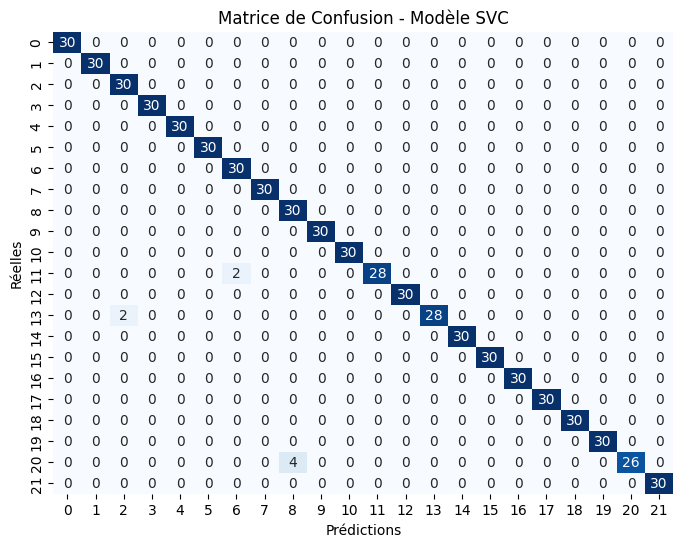

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title("Matrice de Confusion - Modèle SVC")
plt.show()


In [82]:
# Rapport de classification
print("Rapport de classification :\n", classification_report(y_test, y_pred_svc))


Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.94      1.00      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.94      1.00      0.97        30
           7       1.00      1.00      1.00        30
           8       0.88      1.00      0.94        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      0.93      0.97        30
          12       1.00      1.00      1.00        30
          13       1.00      0.93      0.97        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        3

# **RandomForest**

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30, 40, 50],        # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],                # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],                  # Nombre minimum d'échantillons dans une feuille
    'bootstrap': [True, False]                      # Méthode d'échantillonnage
}

# Initialiser RandomizedSearchCV pour RandomForestClassifier
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_grid,
    cv=5,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)

# Exécuter la recherche sur les données d'entraînement
random_search_rf.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_rf = random_search_rf.best_params_
print("Meilleurs paramètres pour RandomForest:", best_params_rf)


Meilleurs paramètres pour RandomForest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}


In [84]:
# Meilleur modèle après optimisation
best_rf = random_search_rf.best_estimator_

# Entraîner le modèle sur les données d'entraînement
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=50, min_samples_split=5)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

# Prédictions sur l'ensemble de test
y_pred_rf = best_rf.predict(X_test)

# Calcul de la matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion :\n", cm_rf)


Matrice de confusion :
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 29  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0

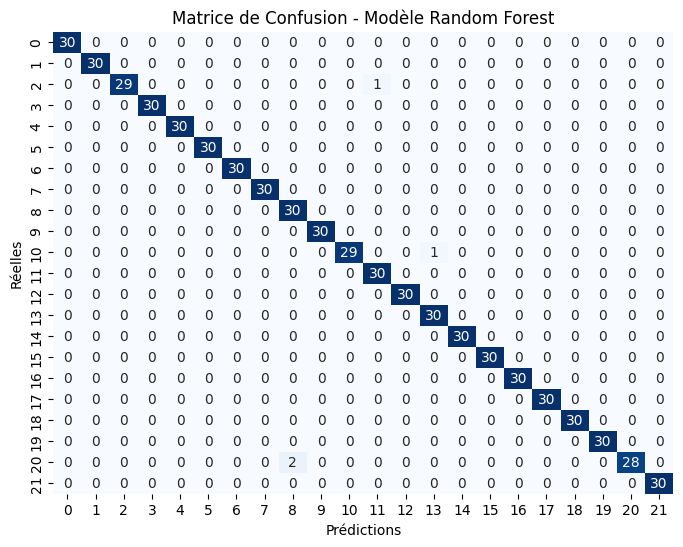

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title("Matrice de Confusion - Modèle Random Forest")
plt.show()


In [87]:
# Rapport de classification
print("Rapport de classification :\n", classification_report(y_test, y_pred_rf))


Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        3